### aim: 

### date: 

In [66]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [67]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [68]:
import numpy as np
from cmocean import cm
import cartopy as cp
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.pyplot as plt
import xarray as xr
import sys
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE')
#list of models
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE/UTILS')
import lom
import utils as ut

%matplotlib inline
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')
import cartopy.feature as cfeature
from importlib import reload
import matplotlib.path as mpath
import glob
import pickle
import pandas as pd
import seawater
import time
plt.rcParams.update({'font.size': 12})
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : 12}

plt.rc('font', **font)

In [69]:
extract = False
if extract:
    tdir = '/gpfs/data/greenocean/software/runs/regridded/'
    w = xr.open_dataset(f'{tdir}TOM12_RW_CO2a-nut-dall-2018-2022_regrid.nc')
    wmn = w.isel(deptht=slice(0,17)).mean(dim = ['time_counter'])
    RW_CO2a_dint = wmn.weighted(wmn.deptht.isel(deptht=slice(0,17))).mean(dim = ['deptht'])
    RW_CO2a_dint.to_netcdf(f'{tdir}TOM12_RW_CO2a-nut-dint-2018-2022_regrid.nc')
    print(f'{tdir}TOM12_RW_CO2a-nut-dint-2018-2022_regrid.nc')
    
    w = xr.open_dataset(f'{tdir}TOM12_RW_ECOa-nut-dall-2018-2022_regrid.nc')
    wmn = w.isel(deptht=slice(0,17)).mean(dim = ['time_counter'])
    RW_ECOa_dint = wmn.weighted(wmn.deptht.isel(deptht=slice(0,17))).mean(dim = ['deptht'])
    RW_ECOa_dint.to_netcdf(f'{tdir}TOM12_RW_ECOa-nut-dint-2018-2022_regrid.nc')
    print(f'{tdir}TOM12_RW_ECOa-nut-dint-2018-2022_regrid.nc')
    
    w = xr.open_dataset(f'{tdir}TOM12_TJ_CA02-nut-dall-2018-2022_regrid.nc')
    wmn = w.isel(deptht=slice(0,17)).mean(dim = ['time_counter'])
    TJ_CA02_dint = wmn.weighted(wmn.deptht.isel(deptht=slice(0,17))).mean(dim = ['deptht'])
    TJ_CA02_dint.to_netcdf(f'{tdir}TOM12_TJ_CA02-nut-dint-2018-2022_regrid.nc')
    print(f'{tdir}TOM12_TJ_CA02-nut-dint-2018-2022_regrid.nc')
    
    w = xr.open_dataset(f'{tdir}TOM12_TJ_EA02-nut-dall-2018-2022_regrid.nc')
    wmn = w.isel(deptht=slice(0,17)).mean(dim = ['time_counter'])
    TJ_EA02_dint = wmn.weighted(wmn.deptht.isel(deptht=slice(0,17))).mean(dim = ['deptht'])
    TJ_EA02_dint.to_netcdf(f'{tdir}TOM12_TJ_EA02-nut-dint-2018-2022_regrid.nc')
    print(f'{tdir}TOM12_TJ_EA02-nut-dint-2018-2022_regrid.nc')

In [70]:
extract = False
if extract:
    tdir = '/gpfs/data/greenocean/software/runs/regridded/'
    w = xr.open_dataset(f'{tdir}TOM12_RW_CO2a-nut-dall-2018-2022_regrid.nc')
    wmn = w.isel(deptht=slice(0,5)).mean(dim = ['time_counter'])
    RW_CO2a_dint50 = wmn.weighted(wmn.deptht.isel(deptht=slice(0,5))).mean(dim = ['deptht'])
    RW_CO2a_dint50.to_netcdf(f'{tdir}TOM12_RW_CO2a-nut-dint50-2018-2022_regrid.nc')
    print(f'{tdir}TOM12_RW_CO2a-nut-dint50-2018-2022_regrid.nc')
    
    w = xr.open_dataset(f'{tdir}TOM12_RW_ECOa-nut-dall-2018-2022_regrid.nc')
    wmn = w.isel(deptht=slice(0,5)).mean(dim = ['time_counter'])
    RW_ECOa_dint50 = wmn.weighted(wmn.deptht.isel(deptht=slice(0,5))).mean(dim = ['deptht'])
    RW_ECOa_dint50.to_netcdf(f'{tdir}TOM12_RW_ECOa-nut-dint50-2018-2022_regrid.nc')
    print(f'{tdir}TOM12_RW_ECOa-nut-dint50-2018-2022_regrid.nc')
    
    w = xr.open_dataset(f'{tdir}TOM12_TJ_CA02-nut-dall-2018-2022_regrid.nc')
    wmn = w.isel(deptht=slice(0,5)).mean(dim = ['time_counter'])
    TJ_CA02_dint50 = wmn.weighted(wmn.deptht.isel(deptht=slice(0,5))).mean(dim = ['deptht'])
    TJ_CA02_dint50.to_netcdf(f'{tdir}TOM12_TJ_CA02-nut-dint50-2018-2022_regrid.nc')
    print(f'{tdir}TOM12_TJ_CA02-nut-dint50-2018-2022_regrid.nc')
    
    w = xr.open_dataset(f'{tdir}TOM12_TJ_EA02-nut-dall-2018-2022_regrid.nc')
    wmn = w.isel(deptht=slice(0,5)).mean(dim = ['time_counter'])
    TJ_EA02_dint50 = wmn.weighted(wmn.deptht.isel(deptht=slice(0,5))).mean(dim = ['deptht'])
    TJ_EA02_dint50.to_netcdf(f'{tdir}TOM12_TJ_EA02-nut-dint50-2018-2022_regrid.nc')
    print(f'{tdir}TOM12_TJ_EA02-nut-dint50-2018-2022_regrid.nc')


106 C:16 N:1 P:0.1-0.001 Fe

In [71]:
tdir = '/gpfs/data/greenocean/software/runs/regridded/'
w3 = xr.open_dataset(f'{tdir}TOM12_TJ_EA02-nut-dint50-2018-2022_regrid.nc')

In [72]:
# w2 = xr.open_dataset(f'{tdir}TOM12_TJ_EA02-nut-dall-2018-2022_regrid.nc')
# w2.deptht[0:5]

As mentioned by Bristow et al. (2017), the Redfield ratio is complemented by iron in a proportion of 0.0075 parts, which means N:P:Si:Fe corresponds to 16:1:16:0.0075. 

16:1:16:0.0075

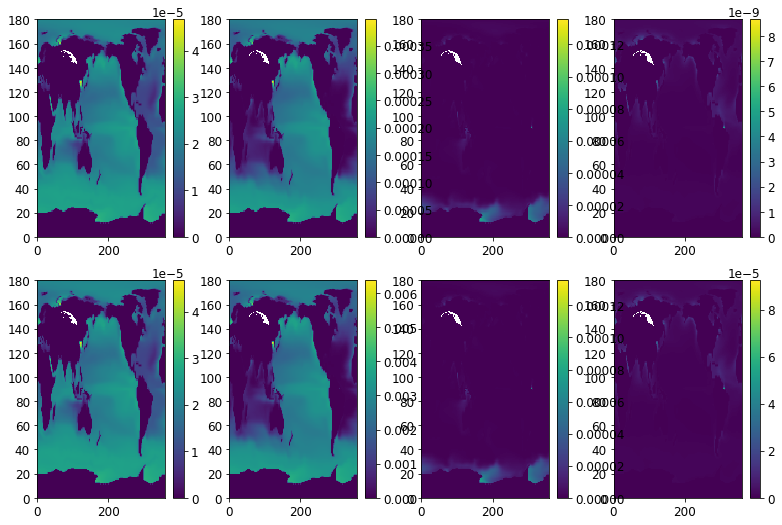

In [74]:
#16:1:16:0.0075

N_P = 16
N_Fe_0075 = 16/0.0015
#106 C:16 N:1 P:0.1-0.001 Fe.

w3['Fer_rat'] = w3['Fer'] * N_Fe_0075
w3['P_rat'] = w3['PO4'] * N_P


# plt.pcolormesh(w3['P_rat'])
# plt.colorbar()

fact = 1.1
fig, axs = plt.subplots(2,4, figsize=(12*fact, 8*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

q = axs[0].pcolormesh(w3['NO3'])
plt.colorbar(q, ax = axs[0])
q = axs[1].pcolormesh(w3['PO4'])
plt.colorbar(q, ax = axs[1])
q = axs[2].pcolormesh(w3['Si'])
plt.colorbar(q, ax = axs[2])
q = axs[3].pcolormesh(w3['Fer'])
plt.colorbar(q, ax = axs[3])

q = axs[4].pcolormesh(w3['NO3'])
plt.colorbar(q, ax = axs[4])
q = axs[5].pcolormesh(w3['P_rat'])
plt.colorbar(q, ax = axs[5])
q = axs[6].pcolormesh(w3['Si'])
plt.colorbar(q, ax = axs[6])
q = axs[7].pcolormesh(w3['Fer_rat'])
plt.colorbar(q, ax = axs[7])

In [76]:
def print_var_values_at_indices(ds, x, y):
    """
    Print the values of variables var1 to var6 at the given indices (x, y) in the dataset.

    Parameters:
    - ds: xarray.Dataset containing the variables.
    - x: Index along the first dimension.
    - y: Index along the second dimension.
    """
    # List of variable names to print values for
    var_names = ['NO3','P_rat','Si','Fer_rat']
    values = {}

    # Iterate through each variable to print its value and store it for comparison
    for var_name in var_names:
        if var_name in ds:
            value = ds[var_name].isel({ds[var_name].dims[0]: y, ds[var_name].dims[1]: x}).values.item()
            values[var_name] = value
            print(f"Value of {var_name} at indices ({x}, {y}): {value}")
        else:
            print(f"Variable {var_name} not found in dataset.")

    # Identify and print the variable with the largest value at the specified indices
    if values:
        max_var = max(values, key=values.get)
        max_value = values[max_var]
        print(f"The largest value at indices ({x}, {y}) is {max_value}, from variable {max_var}.")
        min_var = min(values, key=values.get)
        min_value = values[min_var]
        print(f"The min value at indices ({x}, {y}) is {min_value}, from variable {min_var}.")

    else:
        print("No variables found or all variables are missing at the specified indices.")

            
print_var_values_at_indices(w3,200,50)

Value of NO3 at indices (200, 50): 2.261972622363828e-05
Value of P_rat at indices (200, 50): 0.002737202448770404
Value of Si at indices (200, 50): 2.1403340610959276e-07
Value of Fer_rat at indices (200, 50): 5.992214369143767e-07
The largest value at indices (200, 50) is 0.002737202448770404, from variable P_rat.
The min value at indices (200, 50) is 2.1403340610959276e-07, from variable Si.


In [84]:
# Rw3_CO2a_dint = xr.open_dataset(f'{tdir}TOM12_Rw3_CO2a-phyto-dint-2018-2022_regrid.nc')
# # Replace NaNs w3ith a very small number before stacking
# # This ensures NaNs are treated as the smallest possible values

variables = ['NO3','P_rat','Si','Fer_rat']

filled = [w3[var].fillna(0) for var in variables]
# Stack the filled variables into a new3 dimension
stacked = xr.concat(filled, 'new3_dim')
# Use argmax to find the index of the maximum value across 'new3_dim'
# Since w3e replaced NaNs, w3e ensure they don't affect the result incorrectly
biomax = stacked.argmin(dim='new3_dim') + 1

variables2 = ['NO3','P_rat','Fer_rat']
filled = [w3[var].fillna(0) for var in variables2]
# Stack the filled variables into a new3 dimension
stacked = xr.concat(filled, 'new3_dim')
# Use argmax to find the index of the maximum value across 'new3_dim'
# Since w3e replaced NaNs, w3e ensure they don't affect the result incorrectly
biomax2 = stacked.argmin(dim='new3_dim') + 1

# Assign the result back to the original dataset, w3ithout the NaN replacement
w3['biomax'] = biomax
w3['biomax2'] = biomax2
w3['biomax'] = w3['biomax'].where(w3['Si'] != 0)
w3['biomax2'] = w3['biomax2'].where(w3['Si'] != 0)

Text(0.14, 0.14, 'made in scratch/PRONG3/nut-lim.ipynb')

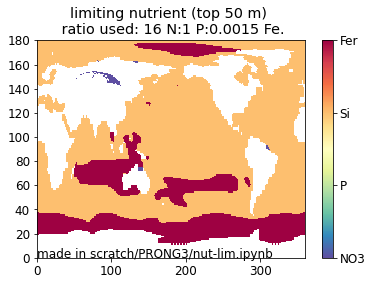

In [90]:
##### plt.figure()
q = plt.pcolormesh(w3.biomax, cmap = 'Spectral_r')
cbar = plt.colorbar(q)
cbar.set_ticks(np.arange(1,5))
cbar.set_ticklabels(['NO3','P','Si','Fer'])
plt.title('limiting nutrient (top 50 m) \n ratio used: 16 N:1 P:0.0015 Fe.')

plt.text(0.14,0.14,s = 'made in scratch/PRONG3/nut-lim.ipynb')
# plt.figure()
# q = plt.pcolormesh(w3.biomax2)
# plt.colorbar(q)